> The cube SN1, SN2 and SN3 of NGC2903 would be good.
> It would be more convenient than the video is interactive, but ... in a notebook to see would be perfect. 
> It would be convenient that the video is centered around a large line for each filter, 
> Eg Halpha to SN3, OIII5007 for SN2, OII3727 to SN1. 
> 
> It can extract the wavelengths in cm-1 and header find the approximate position of the corresponding line + - the velocity of the object. 
> The videos could use 10 images for SN1 and SN2 (which are more basic resolution) and 30 images to SN3. 
> 
> There are several example of the ORCS site: http://celeste.phy.ulaval.ca/orcs-doc/examples.html

> Seb: Its probably a good idea to use hdf5! Plus its more common outside of astronomy anyways

# Exploring Data Cubes with SITELLE

In this notebook, we will... #TODO

## Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Setup](#2.-Setup)
    * [2.1 Using pip](#2.1-Using-pip)
    * [2.2 From source](#2.2-From-source)
* [3. Querying](#3.-Querying)
* [4. Fetching Data](#4.-Fetching-Data)
* [5. Plotting Results](#5.-Plotting-Results)

## 1. Introduction

### SITELLE
#TODO

## 2. Setup
This tutorial will go through some of the basic functionalities of the CADC astroquery package. The CADC module can be installed in two ways:

### 2.1 Using pip
The CADC module is only available with the pre-release of the astroquery module, and can be installed using the command:

```
    pip install --pre --upgrade astroquery
```

### 2.2 From source
Alternatively, you can clone and install from the source:
```
    # If you have a github account:
    git clone git@github.com:astropy/astroquery.git
    # If you do not:
    git clone https://github.com/astropy/astroquery.git
    cd astroquery
    python setup.py install
```
Note that these commands can also be done in a Jupyter notebook by either declaring the code cell a bash cell by pasting `%%bash` at the top of the cell, or preceding each line with a `!`. More information about astroquery can be found at the [astroquery github repository](https://github.com/astropy/astroquery). 


## 3. Querying

### HDF5 Data Cubes
#TODO

In [1]:
%matplotlib inline
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, PowerNorm

import orb
from orcs.core import HDFCube

#Definition


In [2]:
from astroquery.cadc import Cadc

cadc = Cadc()

query = '''SELECT *, 
COORD1(CENTROID(Plane.position_bounds)) AS "RA", 
COORD2(CENTROID(Plane.position_bounds)) AS "Dec."
FROM caom2.Plane AS Plane 
JOIN caom2.Observation AS Observation ON Plane.obsID = Observation.obsID 
WHERE  ( Observation.instrument_name = 'SITELLE' 
AND Observation.collection = 'CFHT' 
AND Plane.dataProductType = 'cube' 
AND LOWER(Observation.target_name) LIKE '%m33_field7%'
AND Plane.energy_bandpassName IN ('SN1', 'SN2', 'SN3') 
AND  ( Plane.quality_flag IS NULL OR Plane.quality_flag != 'junk' ) )'''
#TODO: Ask about target_name?
#AND LOWER(Observation.target_name) LIKE '%m33_field7%'
#AND Observation.proposal_project = 'SIGNALS'

job = cadc.run_query(query, 'sync')
results = job.get_results()

cols = ['caomPublisherID', 'productID', 'target_name', '__RA_', '__Dec._', 
        'energy_bandpassName', 'calibrationLevel', 'dataRelease', 
        'dataProductType', 'energy_emBand', 'sequenceNumber', 'collection',
        'type', 'intent',  'proposal_project', 'proposal_title', 'instrument_name']
results[cols].show_in_notebook()

idx,caomPublisherID,productID,target_name,__RA_,__Dec._,energy_bandpassName,calibrationLevel,dataRelease,dataProductType,energy_emBand,sequenceNumber,collection,type,intent,proposal_project,proposal_title,instrument_name
0,ivo://cadc.nrc.ca/CFHT?2326978p/2326978p,2326978p,m33_field7,23.21647680283865,30.58053107891658,SN1,2,2018-10-12T00:00:00.000,cube,Optical,2326978,CFHT,OBJECT,science,SIGNALS,The SIGNALS Project,SITELLE
1,ivo://cadc.nrc.ca/CFHT?2325242p/2325242p,2325242p,m33_field7,23.216472645228794,30.580531098309184,SN2,2,2018-10-12T00:00:00.000,cube,Optical,2325242,CFHT,OBJECT,science,SIGNALS,The SIGNALS Project,SITELLE
2,ivo://cadc.nrc.ca/CFHT?2309128p/2309128p,2309128p,m33_field7,23.216699483472592,30.58053285862901,SN3,2,2018-10-12T00:00:00.000,cube,Optical,2309128,CFHT,OBJECT,science,SIGNALS,The SIGNALS Project,SITELLE


## Grabbing Data

In [3]:
import re
# From README_UploadaCube.txt -> use 2309128p

#TODO: Smarter way to store filter name???
#Maybe iterate through the table and get urls instead??
results_list = []
for idx in range(len(results)):
    urls = cadc.get_data_urls(results[idx:idx+1], include_auxiliaries=True)
    hdf5_url = next((url.encode('utf-8') for url in urls if '.hdf5' in url), None)
    if hdf5_url:
        target_name = results[idx]['target_name']
        product_id = results[idx]['productID']
        energy_band = results[idx]['energy_bandpassName']
        fname = '{}.{}.{}.hdf5'.format(target_name, product_id, energy_band) 
        results_list.append({'fname': fname, 'url': hdf5_url})

results_list

[{'fname': 'm33_field7.2326978p.SN1.hdf5',
  'url': 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2326978z.hdf5?RUNID=jatqq9l5mu1ifq9l'},
 {'fname': 'm33_field7.2325242p.SN2.hdf5',
  'url': 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2325242z.hdf5?RUNID=vqxdczn7k9seamfc'},
 {'fname': 'm33_field7.2309128p.SN3.hdf5',
  'url': 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2309128z.hdf5?RUNID=dbwvym1m19diwwee'}]

In [4]:
# import requests
# product = results_list[2]
# for product in results_list:
#     resp = requests.get(product['url'], stream=True)
#     if resp.status_code == 200:
#         with open(product['fname'], 'wb') as f:
#             for chunk in resp.iter_content(1024):
#                 f.write(chunk)

In [36]:
# Load a cube 
#cube=HDFCube('./signals/M31_SN3.merged.cm1.1.0.hdf5')
#cube=HDFCube('./2349369z.hdf5')
sn1_cube=HDFCube('m33_field7.2326978p.SN1.hdf5')
sn2_cube=HDFCube('m33_field7.2325242p.SN2.hdf5')
sn3_cube=HDFCube('m33_field7.2309128p.SN3.hdf5')


INFO| Data shape : (2048, 2064, 171)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber
INFO| Data shape : (2048, 2064, 220)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber
INFO| Data shape : (2048, 2064, 842)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


In [63]:
cubes = [sn1_cube, sn2_cube, sn3_cube]
lines = ['[OII]3727', '[OIII]5007', 'Halpha']
bands = ['SN1', 'SN2', 'SN3']

xrhii, yrhii = (690, 270)
xsky, ysky = (1405, 780)
aperture = 3  # Aperture for the spectrum integration (circle)

# def get_spectrums_dict(cube, xrhii=932, yrhii=1025, aperture=3):
#     axis, spectrum = cube.extract_spectrum(xrhii, yrhii, aperture, silent=True)
#     axis2, sky = cube.extract_spectrum(xsky, ysky, aperture, silent=True)
#     spectrum = spectrum - sky
#     return {'spectrum': spectrum, 'sky': sky, 'axis': axis}

# get_line_idx = lambda spectrum: np.where(spectrum == max(spectrum))[0][0]

data_list = []

for cube, line, band in zip(cubes, lines, bands):
    axis, spectrum = cube.extract_spectrum(xrhii, yrhii, aperture, silent=True)
    axis2, sky = cube.extract_spectrum(xsky, ysky, aperture, silent=True)
    spectrum = spectrum - sky
    line_idx = np.where(spectrum == max(spectrum))[0][0]

    data_list.append({'cube': cube, 'line': line, 'band': band,
                      'line_idx': line_idx, 'spectrum': spectrum, 
                      'sky': sky, 'axis': axis})
    

## Deep frame preview
The [deep frame](http://celeste.phy.ulaval.ca/orcs-doc/examples/deep_wcs.html?highlight=deep%20frame) is the mean of the interferometric images along the scan axis . 

<IPython.core.display.Javascript object>


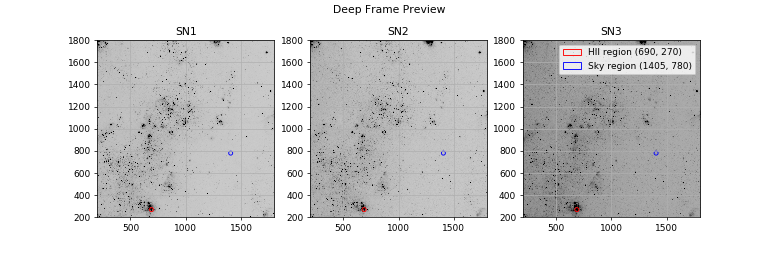

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), frameon=False)

hii_circle = lambda : plt.Circle((xrhii, yrhii), aperture*6, ec='red', 
                                 fill=False, label='HII region ({}, {})'.format(xrhii, yrhii))
sky_circle = lambda : plt.Circle((xsky, ysky), aperture*6, ec='blue', 
                                 fill=False, label='Sky region ({}, {})'.format(xsky, ysky))

for ax, data in zip(axes, data_list):
    deep_frame = data['cube'].get_deep_frame()
    band = data['band']
    
    ax.imshow(deep_frame.T,
               origin='bottom-left',
               vmin=np.nanpercentile(deep_frame, 0.05),
               vmax=np.nanpercentile(deep_frame, 99.5),
               cmap='gray_r')

    ax.add_artist(hii_circle())
    ax.add_artist(sky_circle())
    
    ax.set_title(band)
    ax.set_xlim((200, 1800))
    ax.set_ylim((200, 1800))
    ax.grid()
    
plt.legend(handles=[hii_circle(), sky_circle()])
fig.suptitle('Deep Frame Preview');


Since the energy filter is SN1, we want to look at OII3727 energy bands. For SN2, we will look at OIII5007, and for SN3, we will look at Halpha.

## Extract spectrum

Here we extract the spectrum of an [HII region](https://en.wikipedia.org/wiki/H_II_region) and the sky to find Halpha.

<IPython.core.display.Javascript object>


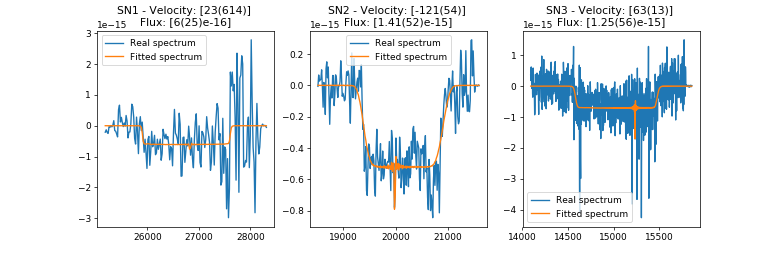

INFO| Number of integrated pixels: 29


 [==========] [100%] [completed in 0.027 s]                                   
 [==========] [100%] [completed in 0.131 s]                                   


INFO| Number of integrated pixels: 29


 [==========] [100%] [completed in 0.028 s]                                   
 [==========] [100%] [completed in 0.143 s]                                   


INFO| Number of integrated pixels: 29


 [==========] [100%] [completed in 0.027 s]                                   
 [==========] [100%] [completed in 0.135 s]                                   


In [68]:
# pos_def: Definition of the position (i.e. wavenumber) parameter of each
#    line e.g. may be ‘free’, ‘fixed’ or a group key (e.g. ‘1’, ‘a’ etc.), 
#    set to ‘free’ by default
# pos_cov: velocity guess of the grouped lines in km/s. the covariation 
#    operation is Doppler shifting.
# https://github.com/thomasorb/orcs/blob/master/orcs/core.py#L1172
# https://github.com/thomasorb/orcs/blob/master/orcs/utils.py#L41
# https://github.com/thomasorb/orb/blob/master/orb/fit.py#L2544

def get_fit_lines_in_spectrum(cube,
                              sky,
                              xrhii=932,
                              yrhii=1025,
                              aperture=3,
                              line='[OII]3727'):
    fit_axis, fit_spectrum, fit_res = cube.fit_lines_in_spectrum(
        xrhii, yrhii, aperture, [line], subtract_spectrum=sky, fmodel='sinc')
    return fit_axis, fit_spectrum, fit_res


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), frameon=False)

for ax, data in zip(axes, data_list):
    fit_axis, fit_spectrum, fit_res = get_fit_lines_in_spectrum(data['cube'],
                                                                data['sky'],
                                                                line=data['line'])
    ax.plot(fit_axis, fit_spectrum, label='Real spectrum')
    ax.plot(fit_axis, fit_res['fitted_vector'], label='Fitted spectrum')
    ax.legend()

    ax.set_title('{} - Velocity: {} \nFlux: {}'.format(
        data['band'], fit_res['velocity_gvar'], fit_res['flux_gvar']))

fig.suptitle('Spectrum', y=1.1);

## Plot an image of [OII]3727, [OIII]5007, Halpha

<IPython.core.display.Javascript object>


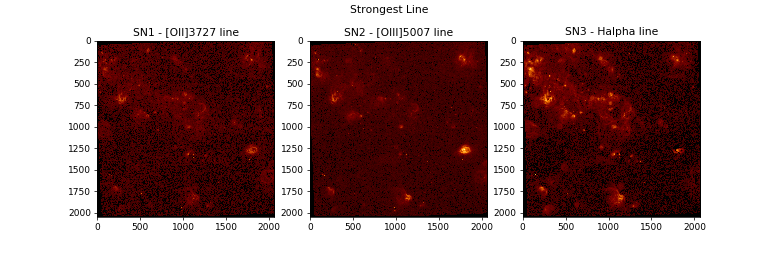

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), frameon=False)

for ax, data in zip(axes, data_list):
    cube = data['cube'] 
    image_data = cube.get_data_frame(data['line_idx'], silent=True)
    image_data[np.where(np.isfinite(image_data) == False)] = 1e-20
    image_data = np.arcsinh(image_data)

    mi = -1e-19
    ma = 8e-16
    #ax.clim(mi,ma)
    gamma = 1./3.5
    ax.imshow(image_data, cmap='afmhot', norm=PowerNorm(gamma=gamma))
    ax.set_title('{} - {} line'.format(data['band'], data['line'] ))
    
fig.suptitle('Strongest Line');

## Create cube widget

In [43]:
# Get dataframes for 20 frames before and after halpha
def get_image_list(cube, line_idx, num_frames=10):
    i_min, i_max = (line_idx - num_frames/2, line_idx + num_frames/2)
    img_list = []
    for i in range(i_min, i_max): 
        img = cube.get_data_frame(i, silent=True) # some array of images
        img[np.where(np.isfinite(img) == False)] = 1e-20
        img = np.arcsinh(img)
        img_list.append(img)
    return img_list

In [71]:
for data in data_list:
    data['img_list'] = get_image_list(data['cube'], data['line_idx'])

<IPython.core.display.Javascript object>


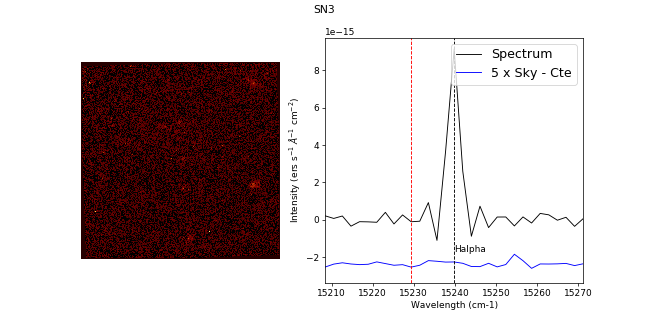

aW50ZXJhY3RpdmUoY2hpbGRyZW49KFNlbGVjdGlvblNsaWRlcihkZXNjcmlwdGlvbj11J1dhdmVsZW5ndGg6JywgbGF5b3V0PUxheW91dCh3aWR0aD11JzcwMHB4JyksIG9wdGlvbnM9KCgnMTXigKY=


In [91]:
%matplotlib notebook

%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import Layout, interact, widgets

def plot_widget(data, num_frames=10):
    mi, ma= -1e-19, 8e-16
    
    img_list, spectrum, sky, axis, line_idx, band = (data['img_list'], data['spectrum'], 
            data['sky'], data['axis'], data['line_idx'], data['band'])
        
    i_min, i_max = (line_idx - num_frames / 2, line_idx + num_frames / 2)

    # TODO: Add line where there is the emmission
    # TODO: Have three??? One for each of the energyband filters??
    fig, (ax0, ax1) = plt.subplots(nrows=1,
                                   ncols=2,
                                   figsize=(10, 5),
                                   gridspec_kw={'width_ratios': [1, 1.3]},
                                   frameon=False)
    # ax1.set_xmargin(0.95)
    # ax1.set_ymargin(0.95)
    #ax1.set_ylim(-20e-15, np.max(spectrum))
    ax1.plot(axis, spectrum, c='k', linewidth=1, label='Spectrum')
    ax1.plot(axis,
             5 * sky - 2.5e-15,
             c='blue',
             linewidth=1,
             label='5 x Sky - Cte')

    ax1.set_xlim(axis[i_min - num_frames], axis[i_max + num_frames])
    ax1.set_xlabel('Wavelength (cm-1)')
    ax1.set_ylabel('Intensity (ers s$^{-1}$ $\AA$$^{-1}$ cm$^{-2}$)')

    ax1.axvline(x=axis[line_idx], c='black', linestyle='--', linewidth=1)
    ax1.annotate( data['line'], (axis[line_idx], -1.7e-15 ))
    
    ax1.legend(fontsize=14)
    ax0.axis('off')
    
    fig.suptitle(band)

    #     ax1.annotate('$\mathrm{H}$'+r'$\alpha$',xy=(0.7,0.8),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('$\mathrm{[NII]\lambda6548}$',xy=(0.72,0.35),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('$\mathrm{[NII]\lambda6583}$',xy=(0.55,0.41),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('$\mathrm{HeI\lambda6678}$',xy=(0.22,0.3),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('$\mathrm{[SII]\lambda6716}$',xy=(0.07,0.41),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('$\mathrm{[SII]\lambda6731}$',xy=(0.01,0.37),xycoords='axes fraction',\
    #                 fontsize=12.0, color='k')
    #     ax1.annotate('-----------------------Sky\'s OH lines-----------------------',\
    # xy=(0.48,0.07),xycoords='axes fraction',\
    #                 fontsize=12.0, color='b')

    def plot_image(wavelength):
        idx = np.where(axis == wavelength)[0][0]
        img = img_list[idx - i_min]
        ax0.imshow(img,
                   cmap='afmhot',
                   norm=PowerNorm(gamma=gamma),
                   clim=[mi, ma])
        if len(ax1.lines) > 3:
            ax1.lines.remove(ax1.lines[-1])
        ax1.axvline(x=axis[idx], color='r', linestyle='--', linewidth=1)
        plt.show()

    interact(plot_image,
             wavelength=widgets.SelectionSlider(options=[
                 ('{:0.0f}'.format(wavelength), wavelength)
                 for wavelength in axis[i_min:i_max]
             ],
                 description='Wavelength:',
                 layout=Layout(width='700px')))
    plt.show()

data = data_list[2]

plot_widget(data)